##### Importing sklearn libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Classification
from sklearn.svm import SVC

# For Splitting, Standardizing and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For accuracy
from sklearn import metrics

# For warning
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('Loan-train.csv')
test_df = pd.read_csv('Loan-test.csv')

In [3]:
print(train_df.shape)
train_df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(test_df.shape)
test_df.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##### Data Cleaning

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Data cleaning of train_df dataset

In [11]:
train_df['Gender'].isnull().sum()

13

In [12]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train_df['Gender'] = train_df['Gender'].replace(np.nan, 'Male')

In [14]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
train_df['Married'].isnull().sum()

3

In [16]:
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
train_df['Married'] = train_df['Married'].replace(np.nan, 'Yes')

In [18]:
train_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
train_df['Dependents'].isnull().sum()

15

In [20]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
train_df['Dependents'] = train_df['Dependents'].replace(np.nan, '0')

In [22]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [23]:
train_df['Self_Employed'].isnull().sum()

32

In [24]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
train_df['Self_Employed'] = train_df['Self_Employed'].replace(np.nan, 'No')

In [26]:
train_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
train_df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']].isnull().sum()

LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [28]:
train_df['LoanAmount'].value_counts().head()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
Name: LoanAmount, dtype: int64

In [29]:
train_df['LoanAmount'] = train_df['LoanAmount'].replace(np.nan, 120.0)

In [30]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].replace(np.nan, 360.0)

In [32]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [33]:
train_df['Credit_History'] = train_df['Credit_History'].replace(np.nan, 1.0)

In [34]:
train_df['Dependents'] = train_df['Dependents'].replace('3+', 4)

In [35]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

##### Data cleaning of test_df dataset

In [36]:
test_df['Gender'].isnull().sum()

11

In [37]:
test_df['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [38]:
test_df['Gender'] = test_df['Gender'].replace(np.nan, 'Male')

In [39]:
test_df['Dependents'].isnull().sum()

10

In [40]:
test_df['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [41]:
test_df['Dependents'] = test_df['Dependents'].replace(np.nan, '0')

In [42]:
test_df['Dependents'] = test_df['Dependents'].replace('3+', 4)

In [43]:
test_df['Self_Employed'].isnull().sum()

23

In [44]:
test_df['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [45]:
test_df['Self_Employed'] = test_df['Self_Employed'].replace(np.nan, 'No')

In [46]:
test_df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']].isnull().sum()

LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

In [47]:
test_df['LoanAmount'].value_counts().head()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
Name: LoanAmount, dtype: int64

In [48]:
test_df['LoanAmount'] = test_df['LoanAmount'].replace(np.nan, 150.0)

In [49]:
test_df['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].replace(np.nan, 360.0)

In [51]:
test_df['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [52]:
test_df['Credit_History'] = test_df['Credit_History'].replace(np.nan, 1.0)

In [53]:
encoder = LabelEncoder()

In [54]:
train_df['Gender'] = encoder.fit_transform(train_df['Gender'])
train_df['Married'] = encoder.fit_transform(train_df['Married'])
train_df['Education'] = encoder.fit_transform(train_df['Education'])
train_df['Self_Employed'] = encoder.fit_transform(train_df['Self_Employed'])
train_df['Property_Area'] = encoder.fit_transform(train_df['Property_Area'])
train_df['Loan_Status'] = encoder.fit_transform(train_df['Loan_Status'])
train_df['Loan_ID'] = encoder.fit_transform(train_df['Loan_ID'])

In [86]:
test_df['Gender'] = encoder.fit_transform(test_df['Gender'])
test_df['Married'] = encoder.fit_transform(test_df['Married'])
test_df['Education'] = encoder.fit_transform(test_df['Education'])
test_df['Self_Employed'] = encoder.fit_transform(test_df['Self_Employed'])
test_df['Property_Area'] = encoder.fit_transform(test_df['Property_Area'])
test_df['Loan_ID'] = encoder.fit_transform(test_df['Loan_ID'])


##### Final train_df and test_df dataset 

In [55]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [87]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


##### Data Visualization

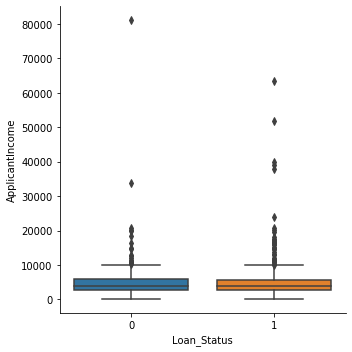

In [57]:
sns.catplot(x = 'Loan_Status',  y = 'ApplicantIncome', kind = 'box', data = train_df)

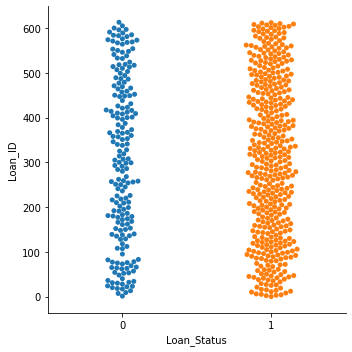

In [58]:
sns.catplot(x = 'Loan_Status',  y = 'Loan_ID', kind = 'swarm', data = train_df)

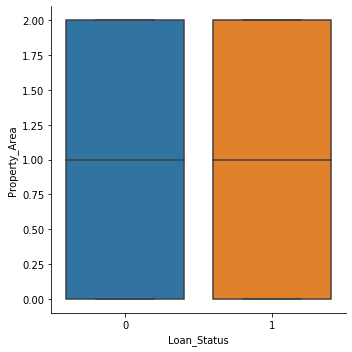

In [65]:
sns.catplot(x = 'Loan_Status',  y = 'Property_Area', kind = 'box',  data = train_df)

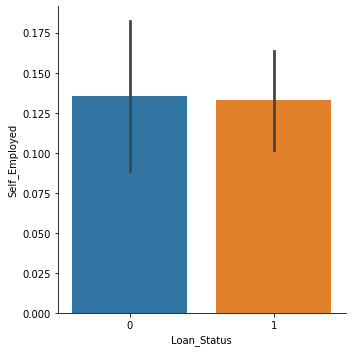

In [66]:
sns.catplot(x = 'Loan_Status',  y = 'Self_Employed', kind = 'bar',  data = train_df)

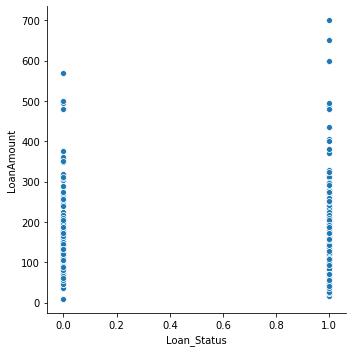

In [67]:
sns.relplot(x = 'Loan_Status',  y = 'LoanAmount',  data = train_df)

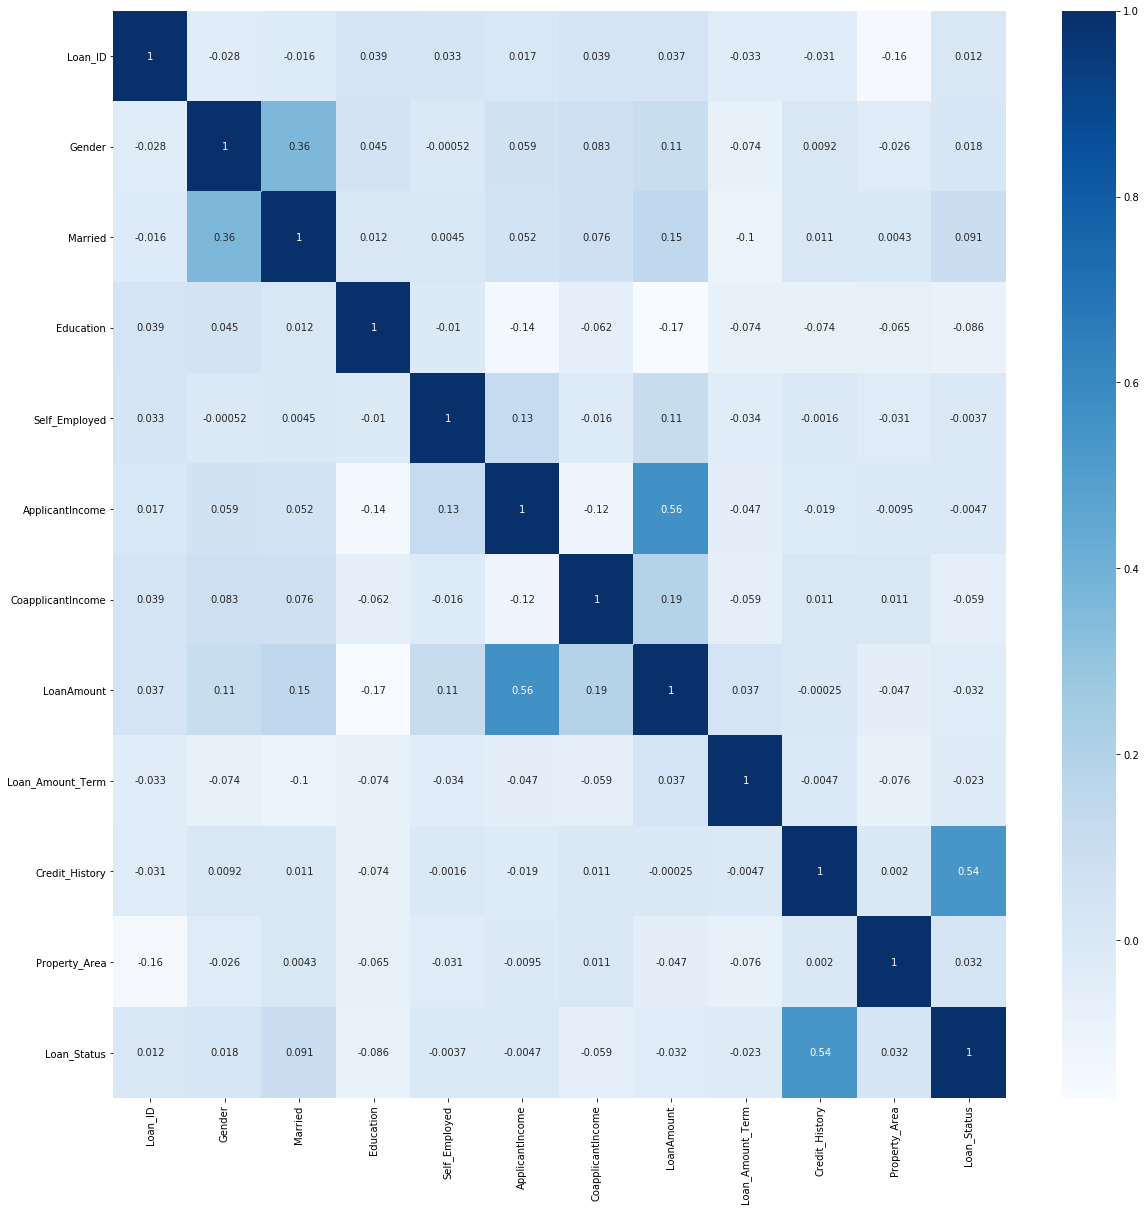

In [68]:
plt.figure(figsize = (20,20))
g = sns.heatmap(train_df.corr(), annot = True, cmap = "Blues")

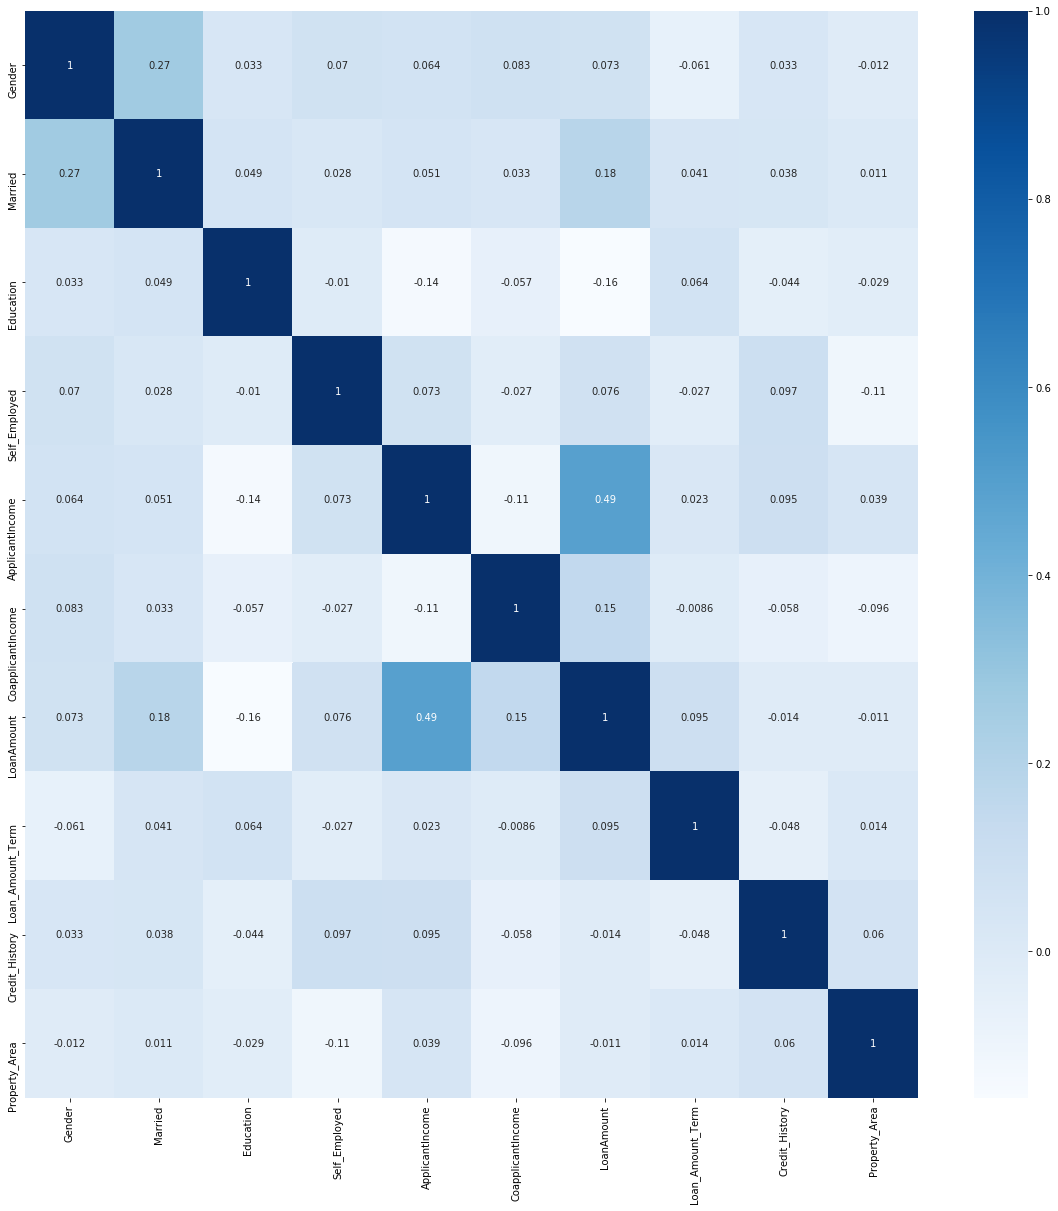

In [69]:
plt.figure(figsize = (20,20))
g = sns.heatmap(test_df.corr(), annot = True, cmap = "Blues")

##### Division of train_df dataset into 'X' and 'Y'

In [70]:
y = np.array(train_df['Loan_Status'])
y = y.reshape(-1,1)

In [71]:
X = train_df.iloc[:, train_df.columns != 'Loan_Status']

##### Splitting and Standardizing of the dataset

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [73]:
X_train.shape ,y_train.shape

((399, 12), (399, 1))

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Support Vector Machines

In [76]:
svm = SVC(verbose = 1, kernel = 'linear')

In [77]:
svm.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=1)

In [78]:
svm_score = svm.score(X_test, y_test)

In [79]:
print('Support Vector Machine score = ', round((svm_score)*100 ,7))

Support Vector Machine score =  81.3953488


In [80]:
y_pred = svm.predict(X_test)

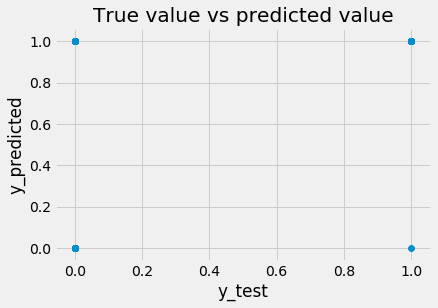

In [82]:
plt.scatter(y_test, y_pred)
plt.ylabel('y_predicted')
plt.xlabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')


##### Prediction on test_df 

In [88]:
test_df['Loan_Status'] = svm.predict(test_df)
test_df['Loan_Status'].head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

##### Roc_auc score

In [89]:
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print('Roc_auc score = ', round((roc_auc) * 100, 2))

Roc_auc score =  71.38


##### Confusion Matrix

In [90]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 30,  38],
       [  2, 145]], dtype=int64)

##### Accuracy Score

In [91]:
acc_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score = ', round((acc_score) * 100, 7))

Accuracy score =  81.3953488


##### Classification Report

In [92]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        68
           1       0.79      0.99      0.88       147

    accuracy                           0.81       215
   macro avg       0.86      0.71      0.74       215
weighted avg       0.84      0.81      0.79       215



In [93]:
test_df[['Loan_ID','Loan_Status']].to_csv('SVM_submission.csv', index = False)